# Required **Libraries**

In [208]:
# Data Analysis and Data Wrangling
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 

#Load and Read Data

In [209]:
train_data = pd.read_csv("/content/IRIS.csv")
train_data.shape

(150, 5)

In [210]:
#Read Data
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [211]:
train_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [212]:
train_data.describe(include = "O")

,species
count,150
unique,3
top,Iris-virginica
freq,50


In [213]:
train_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [214]:
for data in train_data.columns:
  print("no. of Unique in {1} : {0}".format(len(train_data[data].unique()),data))
  print(train_data[data].unique())
  print("-"*80)

no. of Unique in sepal_length : 35
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
--------------------------------------------------------------------------------
no. of Unique in sepal_width : 23
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
--------------------------------------------------------------------------------
no. of Unique in petal_length : 43
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
--------------------------------------------------------------------------------
no. of Unique in petal_width : 22
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
--------------------------------------------------------------------------------
no. of Unique in species : 3
['Ir

In [215]:
#Replace str/sample strings into integer [Encoding]
train_data["species"] = train_data.species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[1,2,3])
train_data['species'].unique()

array([1, 2, 3])

In [216]:
train_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#Visualization

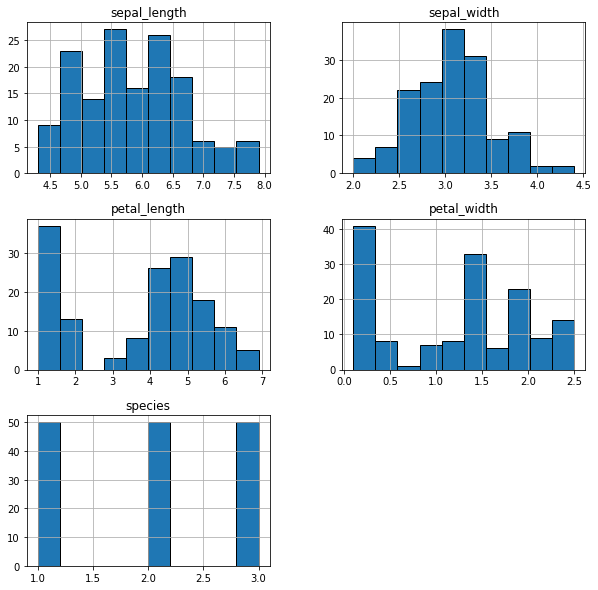

In [217]:
train_data.hist(edgecolor='black',figsize=(10,10))
plt.show()

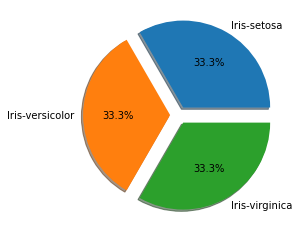

In [218]:
x = train_data.species.value_counts()
plt.pie(x,explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

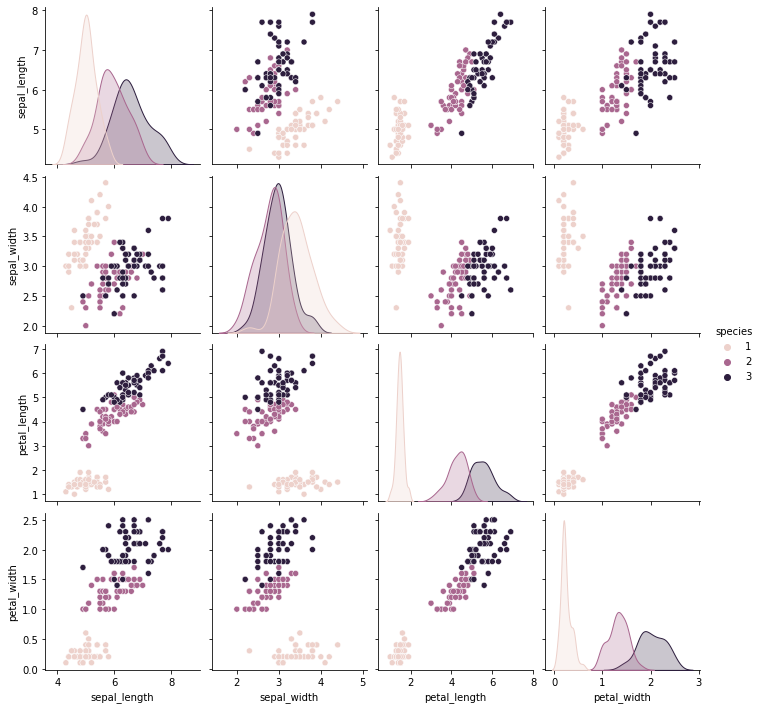

In [219]:
sns.pairplot(train_data , hue='species')

#Modelling

In [220]:
#standard Scaler
col = ["sepal_length","sepal_width","petal_length","petal_width"]
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(train_data.drop("species",axis=1)),columns = col)
y = train_data["species"]

In [221]:
train_x,validation_x,train_y,validation_y = train_test_split(x,y,test_size = 0.2)
train_x.shape,validation_x.shape,train_y.shape,validation_y.shape

((120, 4), (30, 4), (120,), (30,))

In [224]:
model = SVC(degree=4,random_state=10)
model.fit(train_x,train_y)
pred = model.predict(validation_x)
pred

array([1, 2, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 3,
       3, 1, 2, 3, 2, 2, 2, 2])

In [225]:
accuracy = accuracy_score(validation_y,pred)
print("Accuracy : ",accuracy)

Accuracy :  1.0


#**Thanks For Coming**